<a href="https://colab.research.google.com/github/ssvadla/Research_01/blob/main/Supervised_Light_Upsampling_AllData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

train1 = pd.read_csv('/content/drive/My Drive/Research/train_data1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Research/train_data2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Research/train_data3.csv')
train4 = pd.read_csv('/content/drive/My Drive/Research/train_data4.csv')
train5 = pd.read_csv('/content/drive/My Drive/Research/train_data5.csv')
train6 = pd.read_csv('/content/drive/My Drive/Research/train_data6.csv')
train7 = pd.read_csv('/content/drive/My Drive/Research/train_data7.csv')
train8 = pd.read_csv('/content/drive/My Drive/Research/train_data8.csv')
train9 = pd.read_csv('/content/drive/My Drive/Research/train_data9.csv')
train10 = pd.read_csv('/content/drive/My Drive/Research/train_data10.csv')
train_highKappa = pd.read_csv('/content/drive/My Drive/Research/train_data_highkappa.csv')
train1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train = train1
train_list = [train2,train3,train4,train5,train6,train7,train8,train9,train10,train_highKappa]
for i in train_list:
  print(i)
  train = train.append(i)



      Unnamed: 0                                           Sentence    Target
0            659  Appellant had stated to the officers that she ...   Invalid
1           3456  We shall discuss the facts more fully in conne...    Others
2           2043  â€œPerjury is a false statement, either writte...   Invalid
3           3344  The offense is felony theft by false pretext; ...     Issue
4           3231  Numerous contentions urging the commission of ...     Issue
...          ...                                                ...       ...
3471        1561  Therefore, the deletion of reference to the Cl...  Analysis
3472         327  A paraffin test, which was made on the appella...  Analysis
3473        1462  The sole question presented is the sufficiency...     Facts
3474        1169  The answer was in response to the question ask...     Facts
3475        1470  The Stateâ€™s evidence shows that in the sprin...   Invalid

[3476 rows x 3 columns]
      Unnamed: 0                       

In [3]:
train.sort_values("Sentence", inplace = True)
print(len(train))


37711


In [4]:
 new_train = train.drop_duplicates(subset ="Sentence")


In [5]:
train = new_train

In [6]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Others',
       'Conclusion', 'Issue'], dtype=object)

In [7]:
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()


array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [8]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [10]:
test = pd.read_csv(r'/content/drive/My Drive/Research/test_data.csv')

test['Target']=test['Target'].replace(['Others'],'Invalid')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
test['Sentence'] = test['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
test['Sentence'] = test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))
t_p = tfidf_vect.transform(test['Sentence'])

[3 3 5 ... 2 3 2]
[3 3 5 ... 2 3 2]
Class=3, n=660 (14.946%)
Class=5, n=332 (7.518%)
Class=2, n=2253 (51.019%)
Class=0, n=677 (15.331%)
Class=1, n=225 (5.095%)
Class=4, n=269 (6.091%)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


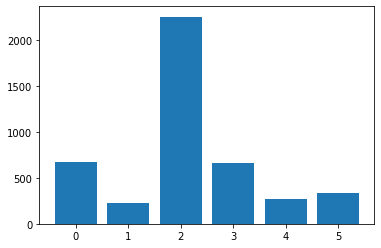

In [11]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
print(y)
# summarize distribution
counter = Counter(y)
print(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [12]:
train['Target'].unique()

array(['Invalid', 'Rule/Law/Holding', 'Facts', 'Analysis', 'Conclusion',
       'Issue'], dtype=object)

In [13]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(4416, 7374)


In [15]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,10000â,1000x22,1006,1008,1008a,100x22,101,1013,1015,102,1020,1026,1030,104,1042,1044,105,10511,1056,1065,107,107c,1081,1084,1097,1099,10a,10acre,11,110,1102,...,œthick,œthis,œthumbusterâ,œto,œtommy,œtoo,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œunless,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œweaving,œwell,œwhat,œwhen,œwhere,œwhether,œwhile,œwhipped,œwhisky,œwhoever,œwhy,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour,œyâ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.111629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=2253 (16.667%)
Class=Rule/Law/Holding, n=2253 (16.667%)
Class=Facts, n=2253 (16.667%)
Class=Analysis, n=2253 (16.667%)
Class=Conclusion, n=2253 (16.667%)
Class=Issue, n=2253 (16.667%)


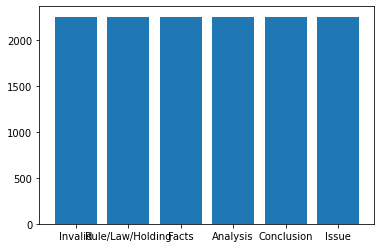

In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


In [17]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import lightgbm as lgb
from sklearn import svm


#X, y = make_classification(random_state=1)
counter = Counter(y)
print(counter)
#X_train, x_val, Y_train, y_val = train_test_split(X_tfidf,train['Target'],test_size=0.26,random_state=42)
X_train, x_val, Y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=42)

classifier = lgb.LGBMClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_val)
#print(np.unique(y_pred))
#print(type(y_pred))

Accuracy_score = accuracy_score(y_val,y_pred)

print('Validation Accuracy_score: %f' % Accuracy_score)
test_pred = classifier.predict(t_p)
acc_test = accuracy_score(test['Target'],test_pred)
print('Accuracy test data', acc_test)
classification_report = classification_report(test['Target'],test_pred,digits=4)
print(classification_report)
matrix = confusion_matrix( y_val, y_pred)
print(matrix)


Counter({'Invalid': 2253, 'Rule/Law/Holding': 2253, 'Facts': 2253, 'Analysis': 2253, 'Conclusion': 2253, 'Issue': 2253})
Validation Accuracy_score: 0.880178
Accuracy test data 0.6218809980806143
                  precision    recall  f1-score   support

        Analysis     0.4918    0.3896    0.4348        77
      Conclusion     0.6452    0.7692    0.7018        26
           Facts     0.7737    0.7041    0.7373       267
         Invalid     0.3910    0.6265    0.4815        83
           Issue     0.7778    0.4118    0.5385        34
Rule/Law/Holding     0.5714    0.5882    0.5797        34

        accuracy                         0.6219       521
       macro avg     0.6085    0.5816    0.5789       521
    weighted avg     0.6517    0.6219    0.6268       521

[[367  12  32  24   0   6]
 [  5 418   5   7   0   0]
 [ 34   4 362  65   3  10]
 [  9   1  54 402   3   8]
 [  2   0  11   7 424   3]
 [  3   0   4  11   1 407]]
